In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# New York Times

In [ ]:
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [2]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['thats' 'pure' 'explains' 'restaurant' 'nothing' 'having' 'larry' 'flag'
 'bright' 'manner' 'crafty' 'liam' 'dallas' 'straight' 'process'
 'cartoons' 'covering' 'garage' 'temporary' 'e']


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [4]:

data.columns[np.argsort(pca.components_[0])[:15]], np.argsort(pca.components_[0])[-15:]
print("Największe elementy dla PC1:")
pc1 = sorted(np.argsort(pca.components_[0])[-15:], reverse=True)
for i, index in enumerate(pc1, start=1):
    print(str(i) + ": " + str(data.columns[index]) + ": " + str(pca.components_[0, index]))
    
print("Najmniejsze elementy dla PC1:")
pc1 = np.argsort(pca.components_[0])[:15]
for i, index in enumerate(pc1, start=1):
    print(str(i) + ": " + str(data.columns[index]) + ": " + str(pca.components_[0, index])) 
    
print("Największe elementy dla PC2:")
pc2 = sorted(np.argsort(pca.components_[1])[-15:], reverse=True)
for i, index in enumerate(pc2, start=1):
    print(str(i) + ": " + str(data.columns[index]) + ": " + str(pca.components_[1, index]))
      
print("Najmniejsze elementy dla PC2:")
pc2 = np.argsort(pca.components_[1])[:15]
for i, index in enumerate(pc2, start=1):
    print(str(i) + ": " + str(data.columns[index]) + ": " + str(pca.components_[1, index]))     
    
# wartości bliższe zeru wskazują, że elementowi mniej odbiega od średniej z danej kolumny    

Największe elementy dla PC1:
1: she: 0.26127391890531626
2: said: 0.1336055676362529
3: process: 0.07119630147343917
4: paintings: 0.06988483529500161
5: painting: 0.08788709841748912
6: my: 0.0943252121195827
7: ms: 0.20211292705699746
8: mrs: 0.06562096808145784
9: mother: 0.10687219119361759
10: me: 0.06379278250161487
11: im: 0.06857385461154249
12: i: 0.15028278883843382
13: her: 0.24529311441720728
14: he: 0.0653100124808925
15: cooper: 0.10300939205022923
Najmniejsze elementy dla PC1:
1: music: -0.11211617341838395
2: trio: -0.08780731643381658
3: theater: -0.07404600988801319
4: orchestra: -0.06926899826753309
5: composers: -0.0585906096705861
6: opera: -0.05555364096730036
7: theaters: -0.051177961569890254
8: m: -0.04902545227080568
9: program: -0.0490013832902936
10: players: -0.048818826144997225
11: festival: -0.04812333139017783
12: east: -0.04794086893749092
13: y: -0.04791174835954267
14: jersey: -0.046032354122822756
15: symphony: -0.04493077625468039
Największe elemen

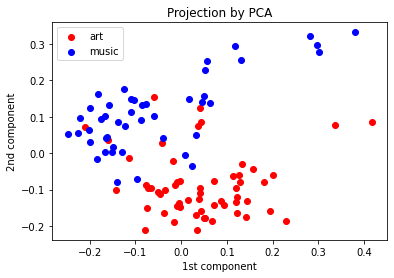

In [5]:
labels = df.loc[:,"class.labels"].values
plt.scatter(X_pca[labels=='art', 0], X_pca[labels=='art', 1], c="red", label="art")
plt.scatter(X_pca[labels=='music', 0], X_pca[labels=='music', 1], c="blue", label="music")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.legend()
plt.show()

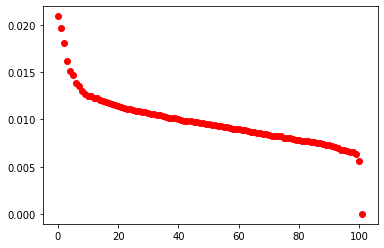

0.15773478029003485


In [6]:
variance_ratio = pca.explained_variance_ratio_

plt.plot(variance_ratio, 'ro')
plt.show()

print(sum(variance_ratio[:10]))

# Cars

In [7]:
df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values

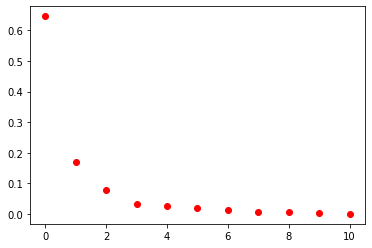

0.8171421089701892


In [8]:
array = StandardScaler().fit_transform(array) # normalizacja
pca = PCA()
X_pca = pca.fit_transform(array)
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[:2]))

In [9]:
attributes = data.columns
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("Attribute, PC1, PC2")
for i in range(0, pc1.shape[0]):
    print(attributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))
# największy element pierwszego pierwszego komponentu - City MPG
# najmniejszy element pierwszego pierwszego komponentu - Engine Size
# największy element drugiego komponentu - Dealer Cost
# najmniejszy element drugiego komponentu - Wheel Base

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.4685086975025387
Dealer Cost:-0.26231863875309525:0.47014658513822594
Engine Size (l):-0.347080492025201:-0.015347186463713858
Cyl:-0.3341887576286371:0.07803201087501857
HP:-0.31860225848402934:0.29221347613918214
City MPG:0.31048172673231283:-0.003365935761659
Hwy MPG:0.30658863858044444:-0.010964460145348576
Weight:-0.33632936694048793:-0.1674635715478704
Wheel Base:-0.2662100335710542:-0.41817710695920424
Len:-0.2567901876706822:-0.40841138066875443
Width:-0.29605459141706114:-0.31289135016250713


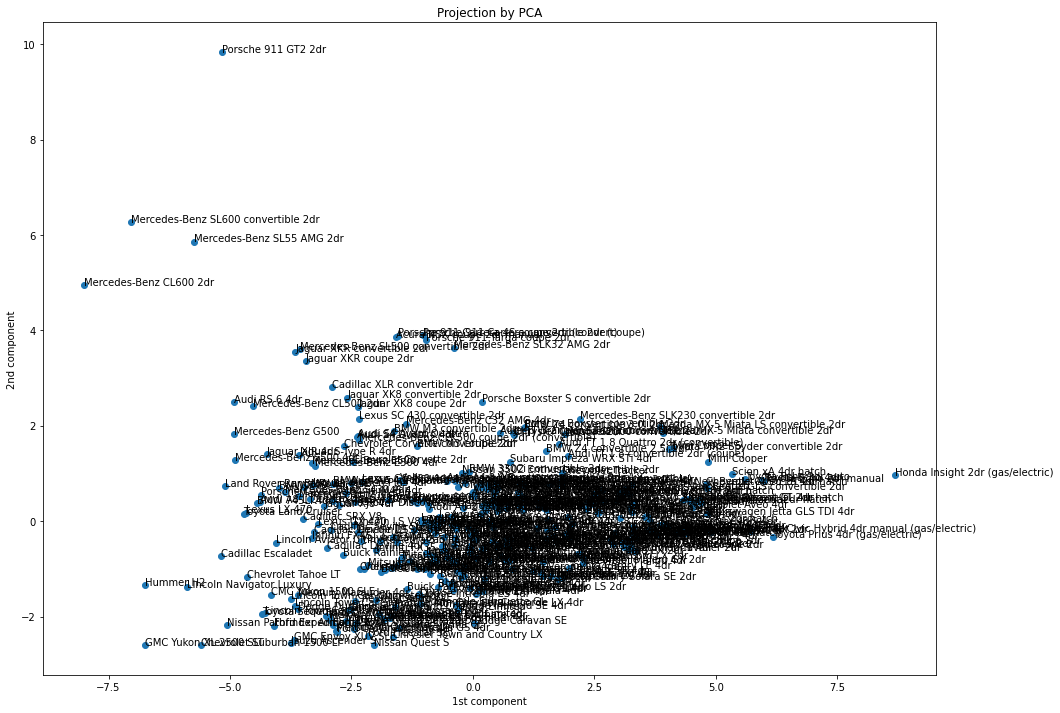

In [10]:
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, txt in enumerate(df.iloc[:,0].values):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

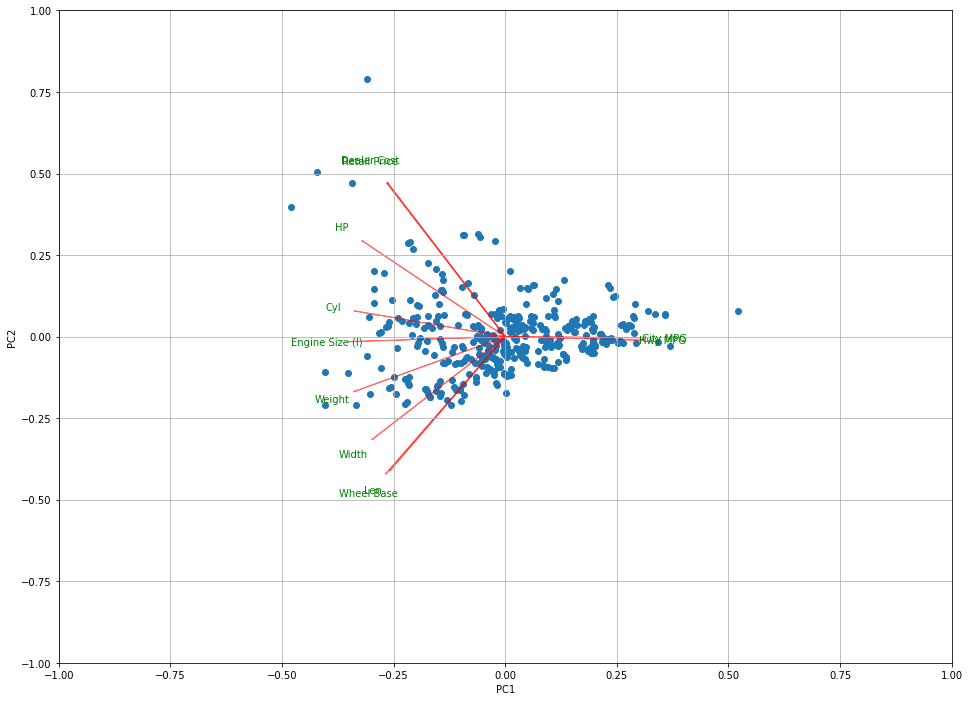

In [12]:
def biplot(score,coeff,pca_component_x,pca_component_y,labels=None):
    pca1=pca_component_x-1
    pca2=pca_component_y-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pca_component_x))
    plt.ylabel("PC{}".format(pca_component_y))
    plt.grid()
labels = data.columns
plt.figure(figsize=(16,12))
biplot(X_pca,np.transpose(pca.components_[0:2, :]),1,2,labels=labels)

# z wykresu wynika, że City MPG oraz HWY MPG są negatywnie skorelowane z pozostałymi cechami
# Można wywnioskować, że Retail Price oraz Dealer cost praktycznie nie są w ogóle skorelowane z Wheel Base i Len